# <font color='#1a5276'> <b> <center> REGRESSION METRICS </center> </b> </font>

## <b> <font color='blue'> Table of Contents </font> </b>

1. [Introduction](#1)
2. [Setup](#2)
3. [Metrics](#3) <br>
    3.1. [MAE](#3.1) <br>
    3.2. [MSE](#3.2) <br>
    3.3. [RMSE](#3.3) <br>
    3.4. [MLSE](#3.4) <br>
    3.5. [R2](#3.5) <br>
    3.6. [MAPE](#3.6) <br>
    3.7. [Putting it all together](#3.7) <br>
4. [Analyzing the Effect of Outliers on Regression ](#4)

<a name="1"></a>
## <font color='blue'> 1. Introduction </font>

This notebook demonstrates how to calculate and interpret key regression metrics, including Mean Absolute Error (MAE), Mean Squared Error (MSE), Root Mean Squared Error (RMSE), R² score, and Mean Absolute Percentage Error (MAPE). It provides practical examples to help understand model performance and error analysis.

<a name="2"></a>
## <font color='blue'> 2. Setup </font>

In [38]:
import numpy as np  
import matplotlib.pyplot as plt  
import numpy as np
from sklearn.metrics import mean_absolute_percentage_error
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [52]:
np.random.seed(42)

<a name="3"></a>
## <font color='blue'> 3. Metrics </font>

Let's start using very simple data.

In [39]:
# Actual and predicted values
y_true = np.array([100, 200, 300, 400, 500])
y_pred = np.array([110, 190, 290, 410, 480])

<a name="3.1"></a>
### <font color='#1f618d'> 3.1. MAE </font>

$$
MAE = \frac{1}{n} \sum_{i=1}^{n} | y_i - \hat{y}_i |
$$


where:

- $n$ is the number of data points.

- $y_i$ is the actual value of the $i$-th data point

- $\hat{y}_i$ is the predicted value of the $i$-th data point.

- $| \cdot |$ denotes the absolute value.



In [12]:
# scikitlearn's implementation
from sklearn.metrics import mean_absolute_error

# Manual calculation
def manual_mae(y_true, y_pred):
    return  np.mean(np.abs(y_true - y_pred))


# Manual MAE calculation
mae_manual = manual_mae(y_true, y_pred)
print(f"Manual MAE: {mae_manual}")

# MAE using scikit-learn
mae_sklearn = mean_absolute_error(y_true, y_pred)
print(f"Scikit-learn MAE: {mae_sklearn}")



Manual MAE: 12.0
Scikit-learn MAE: 12.0


<a name="3.2"></a>
### <font color='#1f618d'> 3.2. MSE </font>

$$
\text{MSE} = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2
$$

where:

- $n$ is the number of data points.
- $y_i$ is the actual value of the $i$-th data point.
- $\hat{y}_i$ is the predicted value of the $i$-th data point.

In [13]:
# Scikit's LEarn implementation
from sklearn.metrics import mean_absolute_error

# Manual implementation
def manual_mse(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)
    

# Manual MSE calculation
mse_manual = manual_mse(y_true, y_pred)
print(f"Manual MSE: {mse_manual}")

# MSE using scikit-learn
mse_sklearn = mean_squared_error(y_true, y_pred)
print(f"Scikit-learn MSE: {mse_sklearn}")



Manual MSE: 160.0
Scikit-learn MSE: 160.0


<a name="3.3"></a>
### <font color='#1f618d'> 3.3. RMSE </font>

$$
\text{RMSE} = \sqrt{\frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2}
$$

where:

* $n$ is the number of data points.
* $y_i$ is the actual value of the $i$-th data point.
* $\hat{y}_i$ is the predicted value of the $i$-th data point.

In [17]:
# Manual implementation
def manual_rmse(y_true, y_pred):
    return np.sqrt(np.mean((y_true - y_pred) ** 2))
    

# Manual RMSE calculation
rmse_manual = manual_rmse(y_true, y_pred)
print(f"Manual RMSE: {rmse_manual}")

# RMSE using scikit-learn
rmse_sklearn = np.sqrt(mean_squared_error(y_true, y_pred))
print(f"Scikit-learn RMSE: {rmse_sklearn}")

Manual RMSE: 12.649110640673518
Scikit-learn RMSE: 12.649110640673518


<a name="3.4"></a>
### <font color='#1f618d'> 3.4. MSLE </font>

$$
\text{MLSE} = \frac{1}{n} \sum_{i=1}^{n} (\log(y_i + 1) - \log(\hat{y}_i + 1))^2
$$

where:

* $n$ is the number of data points.
* $y_i$ is the actual value of the $i$-th data point.
* $\hat{y}_i$ is the predicted value of the $i$-th data point.
* $\log$ represents the natural logarithm.
* the +1 is added to prevent errors when y or y_hat are zero.

In [18]:
# Manual implementation
def manual_msle(y_true, y_pred):
    return  np.mean((np.log1p(y_true) - np.log1p(y_pred)) ** 2)
    

# Manual RMSE calculation
msle_manual = manual_msle(y_true, y_pred)
print(f"Manual MSLE: {msle_manual}")

# RMSE using scikit-learn
msle_sklearn = mean_squared_error(np.log1p(y_true), np.log1p(y_pred)) 
print(f"Scikit-learn MSLE: {msle_sklearn}")

Manual MSLE: 0.002985067793836682
Scikit-learn MSLE: 0.002985067793836682


<a name="3.5"></a>
### <font color='#1f618d'> 3.5. R2 </font>

$$
R^2 = 1 - \frac{\sum_{i=1}^{n} (y_i - \hat{y}_i)^2}{\sum_{i=1}^{n} (y_i - \bar{y})^2}
$$

where:

* $n$ is the number of data points.
* $y_i$ is the actual value of the $i$-th data point.
* $\hat{y}_i$ is the predicted value of the $i$-th data point.
* $\bar{y}$ is the mean of the actual values ($y_i$).

In [20]:
from sklearn.metrics import r2_score

# Manual implementation
def manual_r2(y_true, y_pred):
    return  1 - (np.sum((y_true - y_pred) ** 2) / np.sum((y_true - np.mean(y_true)) ** 2))
    

# Manual R2 calculation
r2_manual = manual_r2(y_true, y_pred)
print(f"Manual R2: {r2_manual}")

# R2 using scikit-learn
msle_sklearn = r2_score(y_true, y_pred)
print(f"Scikit-learn R2: {r2_sklearn}")

Manual R2: 0.992
Scikit-learn R2: 0.992


<a name="3.6"></a>
### <font color='#1f618d'> 3.6. MAPE </font>

$$
\text{MAPE} = \frac{1}{n} \sum_{i=1}^{n} \left| \frac{y_i - \hat{y}_i}{y_i} \right| \times 100\%
$$

where:

* $n$ is the number of data points.
* $y_i$ is the actual value of the $i$-th data point.
* $\hat{y}_i$ is the predicted value of the $i$-th data point.
* $| \cdot |$ denotes the absolute value.

In [21]:
# Manual implementation
def manual_mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100  # In percentage
    

# Manual MAPE calculation
mape_manual = manual_mape(y_true, y_pred)
print(f"Manual MAPE: {mape_manual}")

# MAPE using scikit-learn
msle_sklearn = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
print(f"Scikit-learn MAPE: {mape_sklearn}")

Manual MAPE: 4.966666666666667
Scikit-learn MAPE: 4.966666666666667


<a name="3.7"></a>
### <span style="color:#1f618d;">3.7. Putting It All Together</span>

Let's combine all the metrics in a single function:


In [40]:
def calculate_metrics(y_true, y_pred):
    """
    Calculates various regression evaluation metrics using scikit-learn.

    Args:
        y_true (list or numpy.ndarray): The true values.
        y_pred (list or numpy.ndarray): The predicted values.

    Returns:
        dict: A dictionary containing the calculated metrics (MAE, MSE, RMSE, R2, MAPE).
    """
    metrics = {}

    metrics['MAE'] = mean_absolute_error(y_true, y_pred)
    metrics['MSE'] = mean_squared_error(y_true, y_pred)
    metrics['RMSE'] = np.sqrt(metrics['MSE'])
    metrics['R2'] = r2_score(y_true, y_pred)
    metrics['MAPE'] = mean_absolute_percentage_error(y_true, y_pred) * 100  # MAPE is returned as a percentage

    return metrics

In [42]:
results = calculate_metrics(y_true, y_pred)
for metric, value in results.items():
    print(f"{metric}: {value:.4f}") # format to 4 decimal places.

MAE: 12.0000
MSE: 160.0000
RMSE: 12.6491
R2: 0.9920
MAPE: 4.9667


<a name="4"></a>
## <font color='blue'> 4. Analyzing the Effect of Outliers on Regression  </font>

We will do the following:

- Generate and plot simple linear data.
- Compute regression metrics (MAE, MSE, RMSE, R², etc.).
- Introduce outliers, plot the new data.
- Recalculate metrics and compare results.
- Analyze which metrics are more sensitive to outliers.

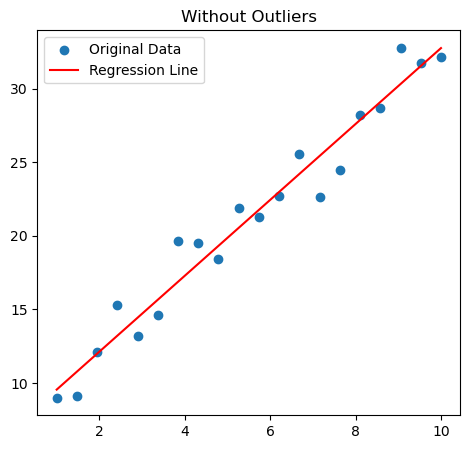

In [53]:
# Generate simple linear data
np.random.seed(42)
X = np.linspace(1, 10, 20).reshape(-1, 1)  # Start from 1 to avoid division issues in MAPE/MSLE
y = 3 * X.flatten() + 5 + np.random.normal(0, 2, size=X.shape[0])  # Linear trend with noise

# Fit a regression model
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)

# Original data
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.scatter(X, y, label="Original Data")
plt.plot(X, y_pred, color="red", label="Regression Line")
plt.title("Without Outliers")
plt.legend()

# Compute regression metrics (without outliers)
metrics_no_outliers = evaluate_metrics(y, y_pred)


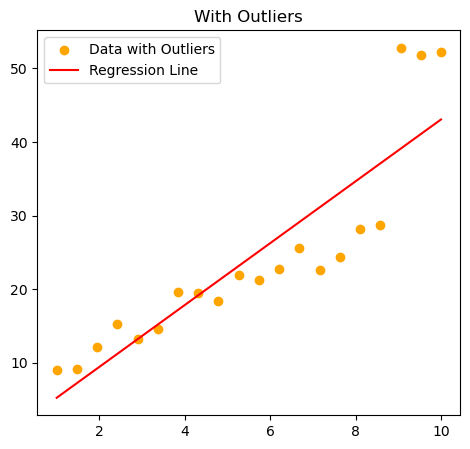

In [54]:
# Introduce outliers
y_outliers = y.copy()
y_outliers[-3:] += 20  # Adding large outliers to the last 3 points

# Refit the model with outliers
model.fit(X, y_outliers)
y_pred_outliers = model.predict(X)

# Recompute metrics (with outliers)
metrics_with_outliers = evaluate_metrics(y_outliers, y_pred_outliers)

# Step 5: Visualization
plt.figure(figsize=(12, 5))

# Data with outliers
plt.subplot(1, 2, 2)
plt.scatter(X, y_outliers, label="Data with Outliers", color="orange")
plt.plot(X, y_pred_outliers, color="red", label="Regression Line")
plt.title("With Outliers")
plt.legend()

plt.show()

In [55]:
# Step 6: Print Metrics
print("Metrics without outliers:")
for key, value in metrics_no_outliers.items():
    print(f"{key}: {value:.4f}")

print("\nMetrics with outliers:")
for key, value in metrics_with_outliers.items():
    print(f"{key}: {value:.4f}")


Metrics without outliers:
MAE: 1.2072
MSE: 2.1838
RMSE: 1.4778
R2: 0.9579
MAPE: 6.4955

Metrics with outliers:
MAE: 4.8920
MSE: 37.8143
RMSE: 6.1493
R2: 0.7767
MAPE: 19.6993


<span style="color:blue">  <b> Let's analyze </b> </span>

- <span style="color:#1f618d;"> Impact on MAE </span>

    - Before outliers: 1.2072

    - After outliers: 4.8920 (↑ significant increase)

    - Why? MAE measures the average absolute difference between actual and predicted values. Since MAE treats all errors equally, the presence of large outliers increased it significantly.


- <span style="color:#1f618d;"> Impact on MSE </span>

    - Before outliers: 2.1838

    - After outliers: 37.8143 (↑ huge increase)

    - Why? MSE squares the errors, making it highly sensitive to large deviations. The outliers had an extreme effect, increasing MSE dramatically compared to MAE.


- <span style="color:#1f618d;"> Impact on RMSE </span>

    - Before outliers: 1.4778

    - After outliers: 6.1493 (↑ large increase)

    - Why? RMSE is just the square root of MSE, so it behaves similarly. The increase shows how RMSE is also highly influenced by large errors.


- <span style="color:#1f618d;"> Impact on R² </span>

    - Before outliers: 0.9579 (good fit)

    - After outliers: 0.7767 (↓ decreased significantly)

    - Why? R² measures how well the model explains variance in data. The outliers increased error, reducing the model's explanatory power.


- <span style="color:#1f618d;"> Impact on MSLE </span>

    - Before outliers: 0.0058

    - After outliers: 0.0488 (↑ moderate increase)

    - Why? Since MSLE applies a log transformation, it reduces the impact of large errors compared to MSE. The increase is noticeable but much smaller than the change in MSE.


- <span style="color:#1f618d;"> Impact on MAPE </span>

    - Before outliers: 6.4955%

    - After outliers: 19.6993% (↑ more than tripled)

    - Why? MAPE measures error as a percentage of actual values, so outliers cause it to increase significantly. However, it still doesn’t explode as much as MSE.



<span style="color:blue">  <b> Key takeways </b> </span>

- MSE and RMSE are extremely sensitive to outliers due to squaring the errors.
- MAE and MAPE also increase significantly, but less than MSE.
- MSLE is more resistant to outliers compared to MSE since it logarithmically scales the errors.
- R² drops, showing the model loses predictive power with outliers.

<span style="color:blue">  <b> Conclusion </b> </span>

- If your dataset has potential outliers, MAE, MAPE, or MSLE might be better choices than MSE/RMSE.
- MSE and RMSE should be used cautiously in datasets prone to outliers since they overemphasize large errors.

<a name="references"></a>
## <font color='blue'> References  </font>

[ScikitLearn](https://scikit-learn.org/stable/)

[jupyterbook](https://jupyterbook.org/en/stable/content/math.html)